In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sympy as sym
sym.init_printing(use_latex='mathjax')

# Interpolación Numérica

La **interpolación numérica** es una técnica matemática utilizada para estimar valores intermedios entre puntos conocidos de una función o conjunto de datos. La idea principal es construir una función (o polinomio) a partir de los datos dados que se aproxime a la función original que los creó, la interpolación también se usa para la aproximación de una función complicada por una más simple de calcular, así ahorrando tiempo de computación.

## Métodos de Interpolación

Existen varios métodos de interpolación, entre los que destacan:

1. **Interpolación Lineal**:
   - Se utiliza para aproximar valores entre dos puntos conocidos.
2. **Interpolación Polinómica**:
   - Se basa en la construcción de un polinomio que pase por todos los puntos dados.
   - El método más común es el de Lagrange, que utiliza polinomios de Lagrange para interpolar.
   - Otro método es el de Newton, que utiliza diferencias divididas.

3. **Splines Cúbicos**:
   - Divide el dominio en segmentos y ajusta polinomios cúbicos a cada segmento.
   - Garantiza continuidad y suavidad en la interpolación.



# Teorema de aproximación de Weierstrass
 Suponga que $f(x)$ es definida y continua en $[a,b]$, entonces, para cada $\varepsilon > 0$
 existe un Polinomio $P(x)$ con la propiedad que,

 $$|f (x) − P(x)| < \varepsilon,$$    
        
para todo $x$ en $[a,b]$. En otras palabras, este teorema garantiza que se puede remplazar la función original por un polinomio; el cuál es más simple de calcular.

# Interpolación Lineal

La **interpolación lineal** es un método matemático utilizado para estimar valores desconocidos que se encuentran entre dos puntos conocidos en una función o conjunto de datos. Es una técnica fundamental en diversas áreas como la ingeniería, las ciencias físicas, la economía y la informática.

## Fórmula de la Interpolación Lineal

La fórmula de la interpolación lineal entre dos puntos $ (x_0, y_0) $ y $ (x_1, y_1) $ para encontrar un valor $ y $ correspondiente a un valor $ x $ dado es:

$$
y = y_0 + \frac{(y_1 - y_0)}{(x_1 - x_0)} \times (x - x_0)
$$

Donde:
- $ x $ es el valor para el cual se desea encontrar $ y $.
- $ (x_0, y_0) $ y $ (x_1, y_1) $ son los puntos conocidos.


La interpolación lineal es esencial por varias razones:

- **Simplicidad**: Es fácil de entender e implementar, lo que la hace accesible para una amplia gama de aplicaciones.
- **Eficiencia Computacional**: Requiere pocos cálculos, lo que es beneficioso para aplicaciones en tiempo real.
- **Versatilidad**: Se puede aplicar en múltiples disciplinas, desde gráficos por computadora hasta análisis de datos.
- **Base para Métodos Más Complejos**: Sirve como fundamento para técnicas de interpolación más avanzadas, como la interpolación polinómica y spline.

## Ejemplo de Implementación

Supongamos que tenemos dos puntos conocidos:
- Punto A: $ (2, 4) $
- Punto B: $ (5, 10) $

Queremos encontrar el valor de $ y $ cuando $ x = 3 $.

Aplicando la fórmula de interpolación lineal:

$$
y = 4 + \frac{(10 - 4)}{(5 - 2)} \times (3 - 2) = 4 + \frac{6}{3} \times 1 = 4 + 2 = 6
$$

Por lo tanto, cuando $ x = 3 $, $ y = 6 $.




In [ ]:
def interpolacion_lineal(x0, y0, x1, y1, x):
    """
    Calcula el valor interpolado de y para un valor dado de x utilizando interpolación lineal.

    Parámetros:
    x0 (float): Coordenada x del primer punto.
    y0 (float): Coordenada y del primer punto.
    x1 (float): Coordenada x del segundo punto.
    y1 (float): Coordenada y del segundo punto.
    x (float): Valor de x para el cual se desea interpolar y.

    Retorna:
    float: Valor interpolado de y.
    """
    if x1 == x0:
        raise ValueError("x0 y x1 no pueden ser iguales.")

    y = y0 + ((y1 - y0) / (x1 - x0)) * (x - x0)
    return y

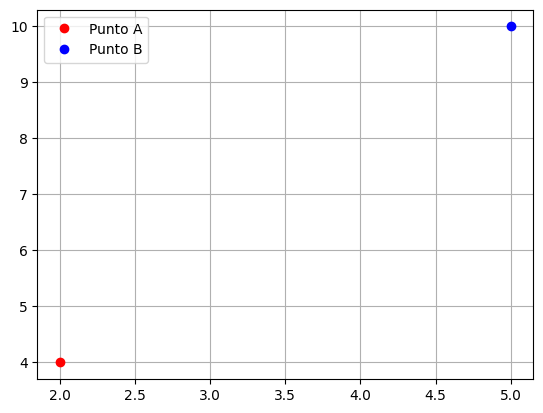

In [ ]:
punto_A = np.array([2, 4])
punto_B = np.array([5, 10])

plt.plot(punto_A[0], punto_A[1], 'ro', label='Punto A')
plt.plot(punto_B[0], punto_B[1], 'bo', label='Punto B')
plt.legend()
plt.grid()
plt.show()

In [ ]:
x = 3
y = interpolacion_lineal(punto_A[0], punto_A[1], punto_B[0], punto_B[1], x)
print(f"El valor interpolado de y para x = {x} es: {y}")

El valor interpolado de y para x = 3 es: 6.0


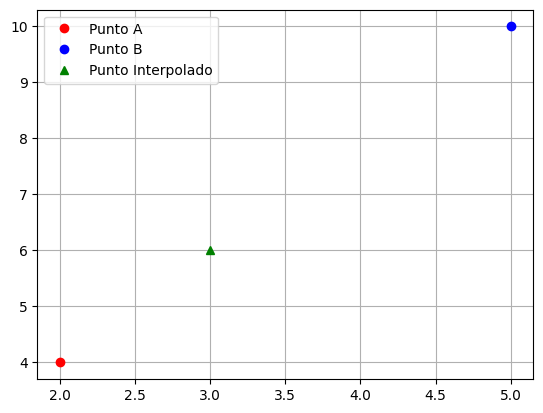

In [ ]:
plt.plot(punto_A[0], punto_A[1], 'ro', label='Punto A')
plt.plot(punto_B[0], punto_B[1], 'bo', label='Punto B')
plt.plot(x, y, 'g^', label='Punto Interpolado')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def Interpolacion_lineal(xi, yi, n):
    ''' Interpolación lineal, esta función toma 2 arrays.
        y devuelve los arrays de valores x e y interpolados.'''

    # Calcular el número total de puntos interpolados
    total_puntos = (len(xi) - 1) * n + 1  # Incluyendo el último punto

    # Inicializar los arrays de salida
    x_interpolados = np.zeros(total_puntos)
    y_interpolados = np.zeros(total_puntos)

    index = 0  # Índice para los arrays de salida

    for i in range(len(xi) - 1):
        # Dividimos el intervalo i,i+1 en n pedazos
        x = np.linspace(xi[i], xi[i + 1], n, endpoint=False)  # No usar el último punto

        # Función que hace interpolación lineal en i,i+1
        f = lambda x: yi[i] + (yi[i + 1] - yi[i]) / (xi[i + 1] - xi[i]) * (x - xi[i])

        # Calcular los valores interpolados y almacenarlos
        y = np.array([f(xk) for xk in x])  # xk son los valores de x en i,i+1

        # Guardar los valores interpolados en el array
        x_interpolados[index:index + n] = x
        y_interpolados[index:index + n] = y
        index += n

    # Guardar el último punto
    x_interpolados[-1] = xi[-1]
    y_interpolados[-1] = yi[-1]

    return x_interpolados, y_interpolados



In [ ]:
xi = np.linspace(-np.pi,np.pi,10)
yi = np.sin(xi)

x_interpolados, y_interpolados = Interpolacion_lineal(xi,yi,10)

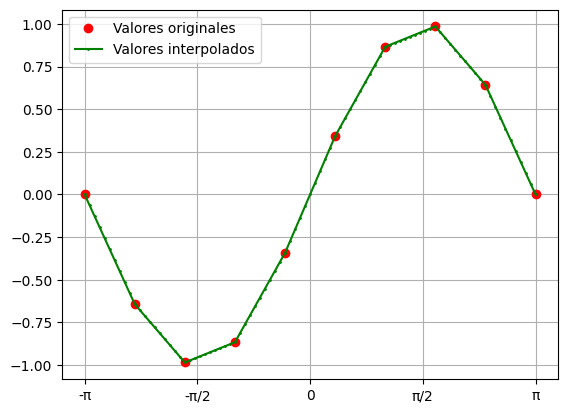

In [ ]:
plt.plot(xi, yi, 'ro', label = 'Valores originales')
plt.plot(x_interpolados, y_interpolados, 'g.-', ms = 2, label = 'Valores interpolados')
plt.legend()
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           ['-π', '-π/2', '0', 'π/2', 'π'])
plt.grid()
plt.show()

# Interpolación de Polinómica

## Definición

La **interpolación de Lagrange** es un método de interpolación polinómica que permite construir un polinomio que pasa por un conjunto dado de puntos.

## Ecuaciones

Para un conjunto de $n+1$ puntos $(x_0, y_0)$, $(x_1, y_1)$, ..., $(x_n, y_n)$, el polinomio de Lagrange se define como:

$$ L(x) = \sum_{i=0}^n y_i \cdot l_i(x) $$

donde $l_i(x)$ es el polinomio base de Lagrange:

$$ l_i(x) = \prod_{j=0, j \neq i}^n \frac{x - x_j}{x_i - x_j} $$

## Importancia

1. **Precisión**: Pasa exactamente por todos los puntos dados.
2. **Flexibilidad**: Puede usarse con puntos no equidistantes.
3. **Base teórica**: Fundamental en el estudio de la interpolación polinómica.
4. **Aplicaciones**: Útil en aproximación de funciones, análisis numérico y procesamiento de señales.


Para mayor claridad, la fórmula completa del polinomio de Lagrange puede expresarse como:

$$ L(x) = \sum_{i=0}^n y_i \cdot \prod_{j=0, j \neq i}^n \frac{x - x_j}{x_i - x_j} $$

Esta fórmula muestra explícitamente cómo cada término del polinomio se construye a partir de los puntos dados.

Consideremos los siguientes puntos:

- $(1, 1)$
- $(2, 4)$
- $(3, 9)$

## Polinomio de Lagrange

El polinomio de Lagrange $P(x)$ se define como:

$$
P(x) = \sum_{i=0}^{n} y_i L_i(x)
$$

donde los polinomios de Lagrange $L_i(x)$ se definen como:

$$
L_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j}
$$

### Cálculo de los Términos de Lagrange

1. **Para $L_0(x)$**:

   $$
   L_0(x) = \frac{(x - 2)(x - 3)}{(1 - 2)(1 - 3)} = \frac{(x - 2)(x - 3)}{(-1)(-2)} = \frac{(x - 2)(x - 3)}{2}
   $$

2. **Para $L_1(x)$**:

   $$
   L_1(x) = \frac{(x - 1)(x - 3)}{(2 - 1)(2 - 3)} = \frac{(x - 1)(x - 3)}{(1)(-1)} = -(x - 1)(x - 3)
   $$

3. **Para $L_2(x)$**:

   $$
   L_2(x) = \frac{(x - 1)(x - 2)}{(3 - 1)(3 - 2)} = \frac{(x - 1)(x - 2)}{(2)(1)} = \frac{(x - 1)(x - 2)}{2}
   $$

### Expresión del Polinomio $P(x)$

Ahora, usando los $y_i$:

$$
P(x) = 1 \cdot L_0(x) + 4 \cdot L_1(x) + 9 \cdot L_2(x)
$$

Sustituyendo $L_0(x)$, $L_1(x)$ y $L_2(x)$:

$$
P(x) = 1 \cdot \left(\frac{(x - 2)(x - 3)}{2}\right) + 4 \cdot \left(-(x - 1)(x - 3)\right) + 9 \cdot \left(\frac{(x - 1)(x - 2)}{2}\right)
$$

### Simplificación

1. **Para $1 \cdot L_0(x)$**:
   $$
   = \frac{(x - 2)(x - 3)}{2} = \frac{x^2 - 5x + 6}{2}
   $$

2. **Para $4 \cdot L_1(x)$**:
   $$
   = 4 \cdot (-(x - 1)(x - 3)) = -4(x - 1)(x - 3) = -4(x^2 - 4x + 3) = -4x^2 + 16x - 12
   $$

3. **Para $9 \cdot L_2(x)$**:
   $$
   = 9 \cdot \left(\frac{(x - 1)(x - 2)}{2}\right) = \frac{9}{2}(x^2 - 3x + 2) = \frac{9}{2}x^2 - \frac{27}{2}x + 9
   $$

### Combinando Términos

Ahora, combinamos todos los términos:

$$
P(x) = \frac{1}{2}(x^2 - 5x + 6) - 4x^2 + 16x - 12 + \left(\frac{9}{2}x^2 - \frac{27}{2}x + 9\right)
$$

Agrupando los términos de $x^2$ y $x$:

1. **Términos de $x^2$**:
   $$
   P(x) = \left(\frac{1}{2} - 4 + \frac{9}{2}\right)x^2
   $$
   $$
   = \left(\frac{1 + 9 - 8}{2}\right)x^2 = \frac{2}{2}x^2 = x^2
   $$

2. **Términos de $x$**:
   $$
   P(x) = \left(-\frac{5}{2} + 16 - \frac{27}{2}\right)x
   $$
   $$
   = \left(-\frac{5 + 27 - 32}{2}\right)x = \frac{32 - 5 - 27}{2}x = \frac{0}{2}x = 0
   $$

3. **Términos constantes**:
   $$
   P(x) = \frac{6}{2} - 12 + 9 = 3 - 12 + 9 = 0
   $$

### Polinomio Final

Así, el polinomio interpolador simplificado es:

$$
P(x) = x^2
$$

### Verificación

Ahora, verifiquemos que el polinomio $P(x) = x^2$ cumple con los puntos:

- Para $x = 1$: $P(1) = 1^2 = 1$
- Para $x = 2$: $P(2) = 2^2 = 4$
- Para $x = 3$: $P(3) = 3^2 = 9$
- Para $x = 2.5$: $P(2.5) = (2.5)^2 = 6.25$

Esto confirma que el polinomio de Lagrange que interpola los puntos dados es efectivamente $P(x) = x^2$.


In [ ]:
# Definir variables
x = sym.symbols('x')

# Puntos dados (x_i, y_i)
puntos = [(1, 1), (2, 4), (3, 9)]  # Ejemplo de puntos

# Extraer las coordenadas x e y
x_vals = [p[0] for p in puntos]
y_vals = [p[1] for p in puntos]

# Inicializar una lista para los polinomios de Lagrange
polinomios_lagrange = []

# Generar los polinomios de Lagrange L_i(x)
for i in range(len(puntos)):
    L_i = 1
    for j in range(len(puntos)):
        if i != j:
            L_i *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])

    polinomios_lagrange.append(L_i)

# Mostrar cada polinomio de Lagrange
for i in range(len(puntos)):
  print(f'L_{i}(x)')
  display(sym.expand(polinomios_lagrange[i]))
  print(5*'----')

polinomio_final = sum(L_i * y_vals[i] for i, L_i in enumerate(polinomios_lagrange))
sym.simplify(polinomio_final)


# Convertir en funciones

L_0 = sym.lambdify(x, polinomios_lagrange[0]*y_vals[0])
L_1 = sym.lambdify(x, polinomios_lagrange[1]*y_vals[1])
L_2 = sym.lambdify(x, polinomios_lagrange[2]*y_vals[2])
P = sym.lambdify(x, polinomio_final)


L_0(x)


 2          
x    5⋅x    
── - ─── + 3
2     2     

--------------------
L_1(x)


   2          
- x  + 4⋅x - 3

--------------------
L_2(x)


 2          
x    3⋅x    
── - ─── + 1
2     2     

--------------------


Veamos los diferentes polinomios
---



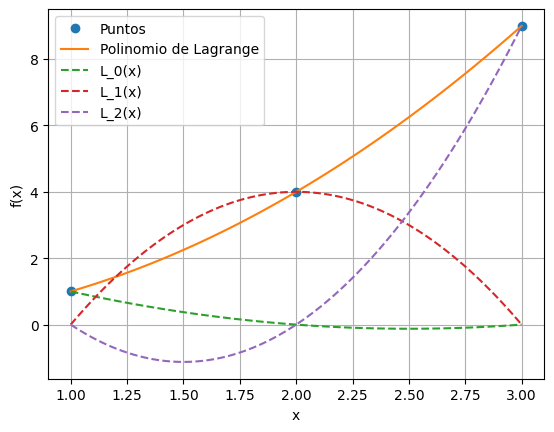

In [ ]:


x = np.array([1, 2, 3])
y = np.array([1, 4, 9])


x_vals = np.linspace(min(x_vals), max(x_vals), 100)


plt.plot(x, y, 'o', label='Puntos')
plt.plot(x_vals, P(x_vals), '-', label='Polinomio de Lagrange')
plt.plot(x_vals, L_0(x_vals), '--', label='L_0(x)')
plt.plot(x_vals, L_1(x_vals), '--', label='L_1(x)')
plt.plot(x_vals, L_2(x_vals), '--', label='L_2(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()


In [ ]:
def Lagrange_Polinomio(x, y):
    """
    Genera el polinomio de Lagrange completo como una función que puede evaluarse en múltiples x.

    :param x: array de puntos x
    :param y: array de puntos y correspondientes
    :return: una función que representa el polinomio de Lagrange
    """
    n = len(x)

    def P(t):
        """ Calcula el polinomio interpolante total en t """
        Pol = 0
        for k in range(n):
            def L(k, t):
                """ Calcula el k-ésimo polinomio base de Lagrange en t """
                lag = 1
                for i in range(n):
                    if i != k:
                        lag *= (t - x[i]) / (x[k] - x[i])
                return lag

            Pol += y[k] * L(k, t)

        return Pol

    return P


In [ ]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])
poly = Lagrange_Polinomio(x, y)

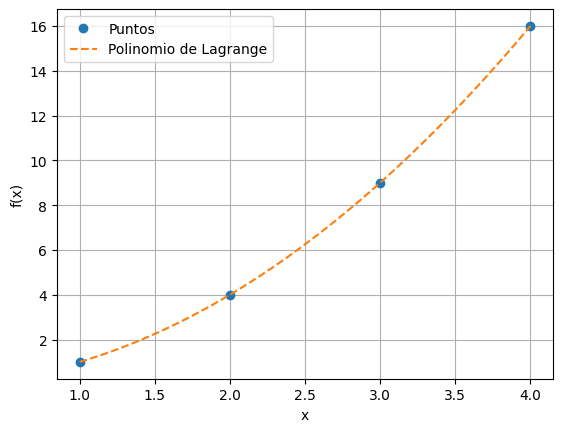

In [ ]:
x_interp = np.linspace(min(x), max(x), 100)
y_interp = poly(x_interp)

plt.plot(x, y, 'o', label='Puntos')
plt.plot(x_interp, y_interp, '--', label='Polinomio de Lagrange')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

## Ejemplo

Sea la función $f(x) = 1/x$ encontremos el polinomio de Lagrange que pasa por los puntos $x_i = [0.15, 0.2, 0.3, 0.5, 0.8, 1.0, 1.4, 1.7]$

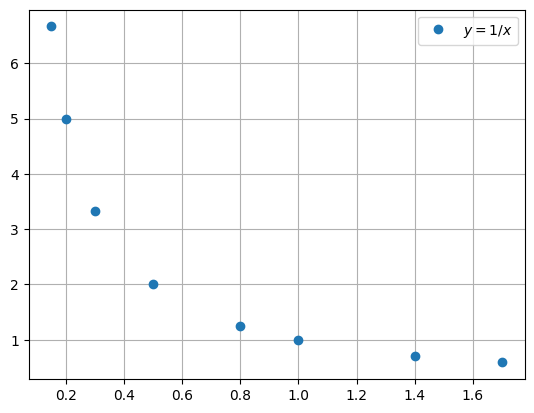

In [ ]:
x = np.array([0.15, 0.2, 0.3, 0.5, 0.8, 1.0, 1.4, 1.7])
f = lambda x: 1/x
y = f(x)
plt.plot(x, y, 'o', label = '$y=1/x$')
plt.legend()
plt.grid()
plt.show()


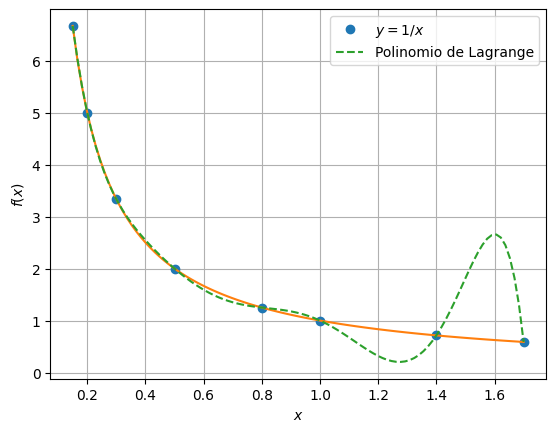

In [ ]:
poly = Lagrange_Polinomio(x, y)
x_interp= np.linspace(min(x), max(x), 100)
y_interp = poly(x_interp)
plt.plot(x, y, 'o', label = '$y=1/x$')
plt.plot(x_interp, f(x_interp), '-')
plt.plot(x_interp, y_interp, '--', label = 'Polinomio de Lagrange')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()

Estas fluctuaciones al incrementar el orden del polinomio tienen base en conceptos que veremos un poco más adelante. Ahora veamos como usar `scipy.interpolate` para encontrar $P_n(x)$

In [ ]:
from scipy.interpolate import lagrange
x = np.array([1, 2, 3])
y = np.array([1, 4, 9])

P = lagrange(x, y)

Pol =  np.poly1d(P)

print(Pol)

   2
1 x


# Error en la Interpolación de Lagrange

La interpolación de Lagrange construye un polinomio de grado $n-1$ que pasa exactamente por $n$ puntos dados. Sin embargo, este polinomio interpolante puede no aproximar bien los valores entre los puntos si la función subyacente no es un polinomio o tiene alta curvatura.

El error en la interpolación de Lagrange está dado por la siguiente fórmula:

$$
R_n(x) = f(x) - P_n(x)
$$

Donde:
- $R_n(x)$ es el error de interpolación.
- $f(x)$ es la función original que estamos tratando de aproximar.
- $P_n(x)$ es el polinomio de interpolación de Lagrange de grado $n-1$.

### Fórmula del Error

El error de interpolación de Lagrange puede expresarse explícitamente como:

$$
R_n(x) = \frac{f^{(n)}(\xi)}{n!} \prod_{i=0}^{n-1} (x - x_i)
$$

Donde:
- $f^{(n)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.


### Implicaciones

- **Tamaño del error**: El término

  $$
  \prod_{i=0}^{n-1} (x - x_i)
  $$

  crece cuando $x$ está lejos de los nodos $x_i$, lo que puede aumentar el error.
  
- **Distribución de puntos**: Si los puntos $x_i$ están distribuidos de manera irregular o están muy separados, el error puede aumentar considerablemente.
  
- **Oscilaciones**: Para funciones suaves, el polinomio de interpolación de Lagrange puede aproximar bien la función dentro del intervalo de los nodos, pero puede oscilar fuera de estos puntos, lo que se conoce como el **fenómeno de Runge**.


### Ejemplo

Supongamos que queremos interpolar la función $f(x) = \sin(x)$ en los puntos $x_0 = 0$, $x_1 = \frac{\pi}{2}$, y $x_2 = \pi$. El error en un punto $x$ sería:

$$
R_3(x) = \frac{f^{(3)}(\xi)}{3!} (x - x_0)(x - x_1)(x - x_2)
$$

Dado que la tercera derivada de $\sin(x)$ es $-\sin(x)$, tenemos:

$$
R_3(x) = \frac{-\sin(\xi)}{6} (x - 0)(x - \frac{\pi}{2})(x - \pi)
$$

Este error será pequeño si $x$ está cerca de los puntos de interpolación, pero puede aumentar significativamente fuera de este rango.

### Actividad
> Utilizando el ejemplo anterior, encuentre el polinomio de orden 2 para la interpolación de los datos y luego escriba la función de error asociada.


## Condición de Runge

La condición de Runge, también conocida como [fenómeno de Runge](https://es.wikipedia.org/wiki/Fen%C3%B3meno_de_Runge), es un problema que ocurre en la interpolación polinómica cuando se usan polinomios de alto grado para interpolar funciones en intervalos cerrados usando puntos equidistantes. En esencia, la condición de Runge muestra que para ciertas funciones, aumentar el grado del polinomio interpolador no siempre mejora la aproximación, y de hecho puede empeorarla significativamente, especialmente cerca de los extremos del intervalo.

Cuando los puntos de interpolación no están uniformemente distribuidos, los polinomios de Lagrange pueden exhibir fluctuaciones significativas por las siguientes razones:

1. **Sensibilidad a la distribución de puntos:**
   Los polinomios de Lagrange son muy sensibles a la ubicación de los puntos de interpolación. Una distribución no uniforme puede resultar en intervalos de tamaños muy dispares.

2. **Oscilaciones en los extremos:**
   Las fluctuaciones son especialmente pronunciadas cerca de los extremos del intervalo de interpolación.

3. **Grado del polinomio:**
   Un mayor número de puntos de interpolación resulta en un polinomio de mayor grado, lo cual tiende a aumentar las oscilaciones.

4. **Error de redondeo:**
   La distribución no uniforme puede exacerbar los errores de redondeo en los cálculos.

